# 2 Practical Part

In [1]:
# List all the libraries
import numpy as np
%pylab inline
from tqdm import tnrange, tqdm_notebook
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## 2.1

$$    \nabla\tilde{R}(b,\mathbf{w})=(\frac{\partial\tilde{R}}{\partial{b}}\quad\frac{\partial\tilde{R}}{\partial{\mathbf{w}}})^T $$
- Implementation regression_gradient with loop
$$\begin{align}
    &\frac{\partial\tilde{R}}{\partial b}(\mathbf{w},b)=2\sum_{i=1}^n(\mathbf{w}^T\mathbf{x}^{(i)}+b-t^{(i)}) \\
    &\frac{\partial\tilde{R}}{\partial w_k}(\mathbf{w},b)=2\sum_{i=1}^n(\mathbf{w}^T\mathbf{x}^{(i)}+b-t^{(i)})x^{(i)}_k+2\lambda w_k\qquad k\in[1,...,d] \label{eq:grd_tild_r}
\end{align}
$$
$$
\begin{align}
b \gets  b - \eta \frac{\partial\tilde{R}}{\partial b} \\
w \gets  w - \eta \frac{\partial\tilde{R}}{\partial w}
\end{align}
$$

- Implementation regression_gradient with vectorisation
$$
\mathbf{X_{[:,0]}} = J_{n,1} = \begin{bmatrix}
1 \\
1 \\
\vdots \\
1
\end{bmatrix}_{n\times1}\qquad \text{where $J_{n,1}$ is a $n\times 1$ vector, and every element is equal to one.}
$$
\begin{align*}
    \nabla\tilde{R}=\frac{\partial\tilde{R}}{\partial{\boldsymbol{\theta}}} = 2\mathbf{X}^T(\mathbf{X}\boldsymbol{\theta}-\mathbf{t})+2\lambda(0\quad\mathbf{w})^T
\end{align*}
$$\boldsymbol{\theta} \gets  \boldsymbol{\theta} - \eta \frac{\partial\tilde{R}}{\partial{\boldsymbol{\theta}}}
$$

In [2]:
class RG:
    def __init__(self,d,lbd=0.1,eta=0.05):
        self.lbd = lbd
        self.eta = eta
        self.d = d
        self.b = 0
        self.w = np.random.random_sample(d)
    
    # Implementation regression_gradient with vectorisation
    # Much faster than the implementation with loop.
    def regression_gradient(self,train_data,num_iters=1000):
        theta = np.hstack((self.b,self.w))
        train_inputs = train_data[:,:-1]
        train_labels = train_data[:,-1]
        n = train_data.shape[0]
        X = np.hstack((np.ones((n,1)),train_inputs))
        t = train_labels
        for itr in tqdm_notebook(range(num_iters)):
            grad = 2*X.T@(X@theta-t)+2*self.lbd*np.hstack((0,theta[1:self.d+1]))
            theta -= self.eta*grad
        self.b = theta[0]
        self.w = theta[1:self.d+1]
        return (self.b,self.w)
    
    # Implementation regression_gradient with loop
    # Much slower than the implementation with vectorisation.
    def regression_gradient_loop(self,train_data,num_iters=1000):     
        self.n = train_data.shape[0]
        train_inputs = train_data[:,:-1]
        train_labels = train_data[:,-1]
        
        for itr in tqdm_notebook(range(num_iters)):
            grad_b = 0
            grad_w = np.zeros(self.d)     
            t = train_labels         
            for i in range(self.n):
                y = self.w.T@train_inputs[i,:]+self.b
                
                grad_b += 2*(y-t[i])
                for k in range(self.d):
                    grad_w[k] += 2*train_inputs[i,k]*(y-t[i])
            
            grad_w += 2*self.lbd*self.w[k]
            self.b -= self.eta*grad_b
            self.w -= self.eta*grad_w
        return (self.b,self.w)
    
    def predict(self,X):
        X=np.copy(X)
        # reshape the X if it's a vector(1d array)
        if len(X.shape)==1:     
            X.shape=((-1,1))
        return X@self.w+self.b

## 2.2

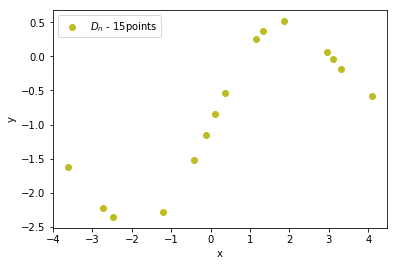

In [3]:
range_x = np.random.uniform(-5, 5, 15)
# Ground truth
# h(x) = sin(x) + 0.3x − 1
def h(x):
    return np.sin(x) + 0.3*x -1
# D_n: (x,h(x))
demo_dataset = np.array(list(zip(range_x,h(range_x))))
pylab.scatter(range_x,h(range_x),c='C8',label="$D_{n}$ - 15points")
pylab.ylabel("y")
pylab.xlabel("x")
pylab.legend()

## 2.3

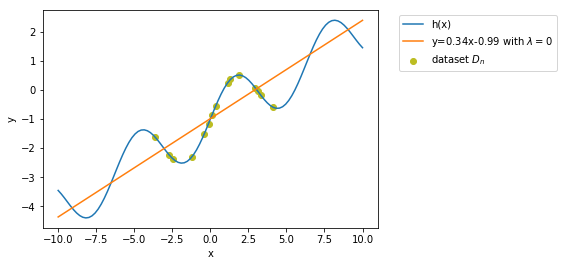

In [4]:
# lambda = 0
lbd = 0
eta = 0.00005
rg = RG(1,lbd,eta)
b,w = rg.regression_gradient(demo_dataset,10**5)
plot_x_2_3 = np.linspace(-10, 10, 100)
plot_y_2_3_learned = rg.predict(plot_x_2_3)
plot_y_2_3_h = h(plot_x_2_3)

params_2_3 = {}
params_2_3['b']=b
params_2_3['w']=w
params_2_3['lbd']=lbd
params_2_3['eta']=eta

def plot_2_3():
    global params_2_3
    b = params_2_3['b']
    w = params_2_3['w']
    lbd = params_2_3['lbd']
    eta = params_2_3['eta']
    
    pylab.plot(plot_x_2_3,plot_y_2_3_h,label="h(x)")
    pylab.plot(plot_x_2_3,plot_y_2_3_learned,
               label="y={:.2f}x{:+.2f} with $\lambda={}$".format(w[0],b,lbd))
    pylab.scatter(range_x,h(range_x),c='C8',label="dataset $D_n$")
    pylab.ylabel("y")
    pylab.xlabel("x")
    pylab.legend(bbox_to_anchor=(1.05, 1))
plot_2_3()

## 2.4

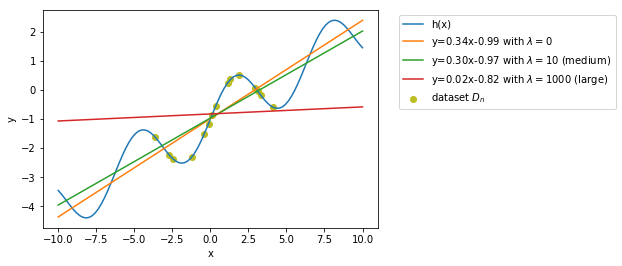

In [5]:
plot_2_3()
# medium lambda
lbd = 10
eta = 0.00005
rg = RG(1,lbd,eta)
b,w = rg.regression_gradient(demo_dataset,100000)
plot_y_2_4_lbd_medium = rg.predict(plot_x_2_3)
pylab.plot(plot_x_2_3,plot_y_2_4_lbd_medium,
          label="y={:.2f}x{:+.2f} with $\lambda={}$ (medium)".format(w[0],b,lbd))

# large lambda
lbd = 1000
eta = 0.00005
rg = RG(1,lbd,eta)
b,w = rg.regression_gradient(demo_dataset,100000)
plot_y_2_4_lbd_large = rg.predict(plot_x_2_3)
pylab.plot(plot_x_2_3,plot_y_2_4_lbd_large,
          label="y={:.2f}x{:+.2f} with $\lambda={}$ (large)".format(w[0],b,lbd))
pylab.ylabel("y")
pylab.xlabel("x")
pylab.legend(bbox_to_anchor=(1.05, 1))

## 2.5

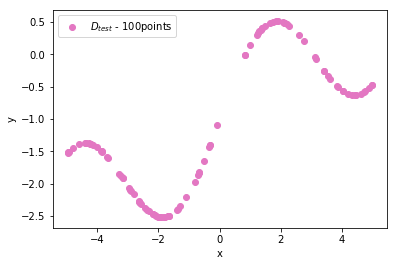

In [6]:
range_x_100 = np.random.uniform(-5, 5, 100)
# D_test
demo_dataset_test = np.array(list(zip(range_x_100,h(range_x_100))))
pylab.scatter(range_x_100,h(range_x_100),c='C6',label="$D_{test}$ - 100points")
pylab.ylabel("y")
pylab.xlabel("x")
pylab.legend()

Text(0,0.5,'average quadratic loss')

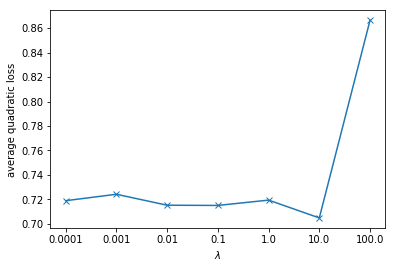

In [7]:
lbd_list = np.array([0.0001, 0.001, 0.01, 0.1, 1, 10, 100])
# average quadratic loss
quad_loss = np.zeros(len(lbd_list))

def calculate_loss(u,v):
    loss = np.mean((u-v)**2)
    return loss

for ind,lbd in enumerate(lbd_list):
    eta = 0.00005
    rg = RG(1,lbd,eta)
    b,w = rg.regression_gradient(demo_dataset,1000)
    plot_y_2_5_learned = rg.predict(demo_dataset_test[:,0])
    quad_loss[ind] = calculate_loss(demo_dataset_test[:,1],plot_y_2_5_learned)

xi = [i for i in range(len(lbd_list))]
plt.xticks(xi, lbd_list)
pylab.plot(xi,quad_loss,marker='x')
pylab.xlabel("$\lambda$")
pylab.ylabel("average quadratic loss")

## 2.6

In [8]:
# Transform x to phi(x)
# l: order
def transform_x(uni_x,l=3):
    n = len(uni_x)
    j = np.ones((n,1))
    uni_x_diag = np.diag(uni_x)
    hi_x = j
    order = 0
    while True:
        hi_x = uni_x_diag@hi_x
        order += 1
        if order>=l:
            break
        j = np.ones((n,1))    
        hi_x = np.hstack((j,hi_x))
    return hi_x

In [9]:
def preproc_train_test_pred(l,eta= 10**(-6),iterations=10**6,lbd= 0.01):
    uni_x = demo_dataset[:,0]
    hi_x = transform_x(uni_x,l)
    demo_labels = demo_dataset[:,-1]
    hi_demo_dataset = np.hstack((hi_x,demo_dataset[:,-1].reshape(-1,1)))
    rg = RG(l,lbd,eta)
    b,w = rg.regression_gradient(hi_demo_dataset,iterations)
    return rg.predict(transform_x(range_x,l)),rg.predict(transform_x(plot_x_2_3,l))

In [10]:
l=1
eta= 10**(-3)
iterations=10**4
plot_y_2_6_order1_train,plot_y_2_6_order1 = preproc_train_test_pred(l,eta,iterations)

In [11]:
l=2
eta= 10**(-4)
iterations=10**5
plot_y_2_6_order2_train,plot_y_2_6_order2 = preproc_train_test_pred(l,eta,iterations)

In [12]:
l=3
eta= 10**(-5)
iterations=10**6
plot_y_2_6_order3_train,plot_y_2_6_order3 = preproc_train_test_pred(l,eta,iterations)

In [13]:
l=4
eta= 10**(-7)
iterations=5*10**6
plot_y_2_6_order4_train,plot_y_2_6_order4 = preproc_train_test_pred(l,eta,iterations)

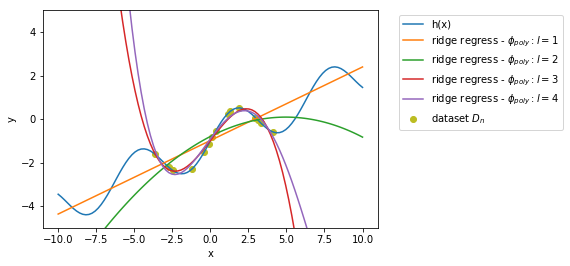

In [14]:
pylab.plot(plot_x_2_3,plot_y_2_3_h,label="h(x)")
pylab.plot(plot_x_2_3,plot_y_2_6_order1,
           label=r"ridge regress - $\phi_{poly}: l=1$")
pylab.plot(plot_x_2_3,plot_y_2_6_order2,
           label=r"ridge regress - $\phi_{poly}: l=2$")
pylab.plot(plot_x_2_3,plot_y_2_6_order3,
           label=r"ridge regress - $\phi_{poly}: l=3$")
pylab.plot(plot_x_2_3,plot_y_2_6_order4,
           label=r"ridge regress - $\phi_{poly}: l=4$")
pylab.scatter(range_x,h(range_x),c='C8',label="dataset $D_n$")
pylab.ylim((-5,5))
pylab.ylabel("y")
pylab.xlabel("x")
pylab.legend(bbox_to_anchor=(1.05, 1))

## 2.7

In [26]:
quad_loss_order = []

for l in range(1,5):
    quad_loss_order.append((l,calculate_loss(demo_dataset_test[:,1],eval("plot_y_2_6_order"+str(l))),
                        calculate_loss(demo_dataset[:,1],eval("plot_y_2_6_order"+str(l)+"_train"))))

    
table_data = list(quad_loss_order)
df = pd.DataFrame(table_data)
df.columns = ['l','loss of $D_{test}$','loss of $D_{n}$']
df

,l,loss of $D_{test}$,loss of $D_{n}$
0,1,4.787609,0.346479
1,2,7.281378,0.312342
2,3,286.530188,0.044044
3,4,539.444395,0.033984


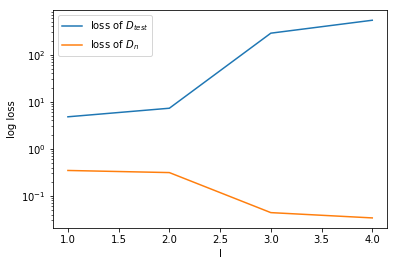

In [35]:
pylab.plot(df.iloc[:,[0]],df.iloc[:,[1]],label="loss of $D_{test}$")
pylab.plot(df.iloc[:,[0]],df.iloc[:,[2]],label="loss of $D_n$")
pylab.ylabel("log loss")
pylab.xlabel("l")
pylab.legend()
pylab.yscale("log")

# Unit Test

In [16]:
import unittest
def whoami(  ):
    import sys
    return sys._getframe(1).f_code.co_name

class TestHW2(unittest.TestCase):
    epsilon = 10**(-5)  
    def test_regression_gradient_loop(self):
        # Test data [[1,1],[2,2],[3,2]]
        train_data = np.array([[1,1],[2,2],[3,2]])
        # dimension=1, labmda = 0, eta = 0.05
        rg = RG(1,0,0.05)
        b,w = rg.regression_gradient_loop(train_data)
        print("[{}] b={},w={}".format(whoami(),b,w))
        self.assertTrue(np.abs(b-2/3)<self.epsilon)
        self.assertTrue(np.abs(w-0.5)<self.epsilon) 
        
    def test_regression_gradient_loop_regularised(self):
        # Test data [[1,1],[2,2],[3,2]]
        train_data = np.array([[1,1],[2,2],[3,2]])
        # dimension=1, labmda = 0.1, eta = 0.05
        rg = RG(1,0.1,0.05)
        b,w = rg.regression_gradient_loop(train_data)
        print("[{}] b={},w={}".format(whoami(),b,w))
        self.assertTrue(np.abs(b-0.7142857142857129)<self.epsilon)
        self.assertTrue(np.abs(w-0.47619048)<self.epsilon)
        
    def test_regression_gradient(self):
        # Test data [[1,1],[2,2],[3,2]]
        train_data = np.array([[1,1],[2,2],[3,2]])
        # dimension=1, labmda = 0, eta = 0.05
        rg = RG(1,0,0.05)
        b,w = rg.regression_gradient(train_data)
        print("[{}] b={},w={}".format(whoami(),b,w))
        self.assertTrue(np.abs(b-2/3)<self.epsilon)
        self.assertTrue(np.abs(w-0.5)<self.epsilon)
     
    def test_regression_gradient_regularised(self):
        # Test data [[1,1],[2,2],[3,2]]
        train_data = np.array([[1,1],[2,2],[3,2]])
        # dimension=1, labmda = 0.1, eta = 0.05
        rg = RG(1,0.1,0.05)
        b,w = rg.regression_gradient(train_data)
        print("[{}] b={},w={}".format(whoami(),b,w))
        self.assertTrue(np.abs(b-0.7142857142857129)<self.epsilon)
        self.assertTrue(np.abs(w-0.47619048)<self.epsilon)
        
    def test_transform_x(self):
        uni_x = np.array([2,3,4])
        hi_x = transform_x(uni_x,3)
        result = np.array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])
        self.assertTrue(np.array_equal(hi_x,result))
    
# if __name__ == '__main__':
#     unittest.main()
suite = unittest.TestLoader().loadTestsFromTestCase(TestHW2)
unittest.TextTestRunner().run(suite)

.


[test_regression_gradient] b=0.6666666666666654,w=[0.5]


.


[test_regression_gradient_loop] b=0.6666666666666654,w=[0.5]


.


[test_regression_gradient_loop_regularised] b=0.7142857142857129,w=[0.47619048]


..


[test_regression_gradient_regularised] b=0.7142857142857129,w=[0.47619048]



----------------------------------------------------------------------
Ran 5 tests in 0.490s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>